In [3]:
!pip install transformers

In [4]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [5]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
classifier("this is such a great movie!")

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [34]:
# prompt: give me a list of positive and nagitive statment and clssify it by my classifier

# Define a list of positive and negative statements
statements = ["This is an amazing product!", "I love this movie!", "The weather is beautiful today!","This is a terrible product.", "I hate this movie!", "The weather is awful today!"]

classifier(statements)


[{'label': 'POSITIVE', 'score': 0.9998854398727417},
 {'label': 'POSITIVE', 'score': 0.9998775720596313},
 {'label': 'POSITIVE', 'score': 0.9998832941055298},
 {'label': 'NEGATIVE', 'score': 0.9996050000190735},
 {'label': 'NEGATIVE', 'score': 0.9996733665466309},
 {'label': 'NEGATIVE', 'score': 0.9995495676994324}]

In [7]:
classifier("this is not great movie!")

[{'label': 'NEGATIVE', 'score': 0.9998014569282532}]

In [12]:
import torch

In [13]:
torch.cuda.is_available()

True

In [14]:
torch.cuda.current_device()

0

In [15]:
classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [16]:
df_ = pd.read_csv("AirlineTweets.csv")

In [17]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df=df_[['airline_sentiment', 'text']].copy()

<Axes: >

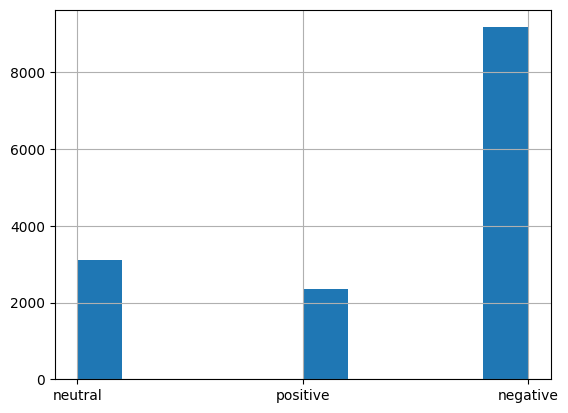

In [19]:
df['airline_sentiment'].hist()

In [20]:
df=df[df.airline_sentiment != 'neutral'].copy()

In [21]:
target_map={'positive':1, 'negative':0}
df['target']= df['airline_sentiment'].map(target_map)

In [22]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [23]:
len(df)

11541

In [24]:
texts = df['text'].tolist()
predictions = classifier(texts)

In [25]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070840954780579},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [26]:
probs = [d['score'] if d['label'].startswith('p') else 1 - d['score'] \
         for d in predictions]
probs

[0.39291590452194214,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.04467874765396118,
 0.01729118824005127,
 0.0005148649215698242,
 0.0006490349769592285,
 0.005917847156524658,
 0.013686656951904297,
 0.0003695487976074219,
 0.001948714256286621,
 0.0035563111305236816,
 0.0031333565711975098,
 0.021235227584838867,
 0.0004781484603881836,
 0.004548370838165283,
 0.0004375576972961426,
 0.0001251697540283203,
 0.004880666732788086,
 0.00040477514266967773,
 0.0006322264671325684,
 0.015428304672241211,
 0.01828092336654663,
 0.0004482865333557129,
 0.0023748278617858887,
 0.006551921367645264,
 0.0023932456970214844,
 0.1338280439376831,
 0.0003237724304199219,
 0.15843814611434937,
 0.0032317638397216797,
 0.00021535158157348633,
 0.1761431097984314,
 0.0006104707717895508,
 0.09156662225723267,
 0.004861712455749512,
 0.00021797418594360352,
 0.0014235973358154297,
 0.004673957824707031,
 0.00464242696762085,
 0.019041001796722412,
 0.00883018970489502,

In [27]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

preds = np.array(preds)

In [28]:
print("acc:", np.mean(df['target']== preds))

acc: 0.8898708950697514


In [29]:
cm = confusion_matrix(df['target'], preds, normalize= 'true')
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

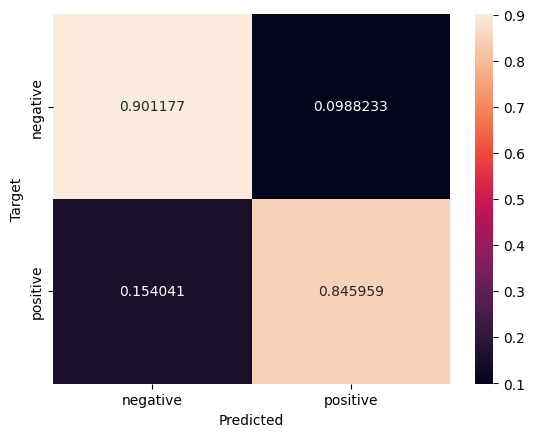

In [30]:
def plot_cm(cm):
  classes =['negative', 'positive']
  df_cm =pd.DataFrame(cm, index=classes, columns=classes)
  ax=sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [31]:
f1_score(df['target'], preds)

0.7587777566900741

In [32]:
f1_score(1-df['target'], 1- preds)

0.928647616908999